In [1]:
import pandas as pd

In [2]:
url = "/Users/axelc/Downloads/world_cup_2018_squads.csv"
data = pd.read_csv(url)

Première approche des données

In [3]:
data.head()

,Type,Team,Group,Position,Name,DOB,Caps,Goals,Country and Club
0,Age,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,England Aston Villa
1,Age,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Egypt Al Ahly
2,Age,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,England West Bromwich Albion
3,Age,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,England West Bromwich Albion
4,Age,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Egypt Al Ahly


Suppression de la colonne dite 'Type'

In [4]:
data2=data.drop(columns="Type")

On vérifie la suppression de la colonne

In [5]:
data2.head()

,Team,Group,Position,Name,DOB,Caps,Goals,Country and Club
0,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,England Aston Villa
1,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Egypt Al Ahly
2,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,England West Bromwich Albion
3,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,England West Bromwich Albion
4,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Egypt Al Ahly


On vérifie la propreté des données, particulièrement la possible absence de données

In [6]:
data.isnull().sum()

Type                0
Team                0
Group               0
Position            0
Name                0
DOB                 0
Caps                0
Goals               0
Country and Club    0
dtype: int64

In [7]:
data2.dtypes

Team                object
Group               object
Position            object
Name                object
DOB                 object
Caps                 int64
Goals                int64
Country and Club    object
dtype: object

On réalise un prmeier tri croissant en fonction du nombre de buts marqués, puis des Capes

In [8]:
data2.sort_values(by="Goals")

,Team,Group,Position,Name,DOB,Caps,Goals,Country and Club
367,Nigeria,D,MF,Wilfred Ndidi,1996-12-16,16,0,England Leicester City
488,Mexico,F,DF,Jesús Gallardo,1994-08-14,20,0,Mexico UNAM
225,Denmark,C,MF,Lukas Lerager,1993-07-12,3,0,France Bordeaux
492,Mexico,F,FW,Javier Aquino,1990-02-11,51,0,Mexico UANL
497,Mexico,F,GK,Alfredo Talavera,1982-09-18,27,0,Mexico Toluca
...,...,...,...,...,...,...,...,...
78,Uruguay,A,FW,Luis Suárez,1987-01-24,97,50,Spain Barcelona
700,Poland,H,FW,Robert Lewandowski (captain),1988-08-21,93,52,Germany Bayern Munich
378,Brazil,E,FW,Neymar,1992-02-05,83,53,France Paris Saint-Germain
286,Argentina,D,FW,Lionel Messi (captain),1987-06-24,123,61,Spain Barcelona


In [9]:
data2.sort_values(by='Caps')

,Team,Group,Position,Name,DOB,Caps,Goals,Country and Club
527,South Korea,F,MF,Lee Seung-woo,1998-01-06,0,0,Italy Hellas Verona
244,France,C,GK,Alphonse Areola,1993-02-27,0,0,France Paris Saint-Germain
619,Panama,G,MF,José Luis Rodríguez,1998-06-19,0,0,Belgium Gent
424,Serbia,E,FW,Luka Jović,1997-12-23,0,0,Germany Eintracht Frankfurt
200,Australia,C,MF,Daniel Arzani,1999-01-04,0,0,Australia Melbourne City
...,...,...,...,...,...,...,...,...
505,Mexico,F,MF,Rafael Márquez,1979-02-13,143,18,Mexico Atlas
500,Mexico,F,MF,Andrés Guardado (captain),1986-09-28,144,25,Spain Real Betis
147,Portugal,B,FW,Cristiano Ronaldo (captain),1985-02-05,149,81,Spain Real Madrid
168,Spain,B,DF,Sergio Ramos (captain),1986-03-30,151,13,Spain Real Madrid


On remet les données en Français

In [10]:
data2.rename(columns={'Team':'Equipe','Group':'Groupe','Position':'Poste','Name':'Nom','DOB':'Naissance','Caps':'Capes','Goals':'Buts','Country and Club':'Pays et Club'},inplace=True)

In [11]:
data2.head()

,Equipe,Groupe,Poste,Nom,Naissance,Capes,Buts,Pays et Club
0,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,England Aston Villa
1,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Egypt Al Ahly
2,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,England West Bromwich Albion
3,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,England West Bromwich Albion
4,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Egypt Al Ahly


On regarde la moyenne totale de buts au sein de tous les joueurs

In [12]:
mean_goals = data2['Buts'].mean()

In [13]:
print(mean_goals)

4.391304347826087


On change le type de la donnée 'Naissance' et on vérifie le changement

In [14]:
data2.Naissance = pd.to_datetime(data2.Naissance)

In [15]:
data2.dtypes

Equipe                  object
Groupe                  object
Poste                   object
Nom                     object
Naissance       datetime64[ns]
Capes                    int64
Buts                     int64
Pays et Club            object
dtype: object

In [16]:
data2.describe()

,Naissance,Capes,Buts
count,736,736.000000,736.000000
mean,1990-07-25 02:26:44.347826048,33.745924,4.391304
min,1973-01-15 00:00:00,0.000000,0.000000
25%,1987-09-20 18:00:00,9.000000,0.000000
50%,1990-10-06 12:00:00,23.500000,1.000000
75%,1993-04-07 18:00:00,51.000000,5.000000
max,1999-01-04 00:00:00,156.000000,81.000000
std,NaN,31.788106,8.644711


In [17]:
data2.Equipe.unique()

array(['Egypt', 'Russia', 'Saudi Arabia', 'Uruguay', 'Iran', 'Morocco',
       'Portugal', 'Spain', 'Australia', 'Denmark', 'France', 'Peru',
       'Argentina', 'Croatia', 'Iceland', 'Nigeria', 'Brazil',
       'Costa Rica', 'Serbia', 'Switzerland', 'Germany', 'Mexico',
       'South Korea', 'Sweden', 'Belgium', 'England', 'Panama', 'Tunisia',
       'Colombia', 'Japan', 'Poland', 'Senegal'], dtype=object)

Premier histogramme affichant le nombre total de joueurs par intervalle de Capes

<Axes: >

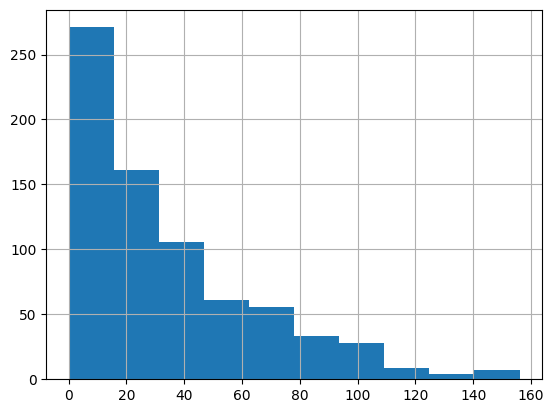

In [18]:
data2.Capes.hist()

Décompte du nombre de joueurs par nombre de buts

In [19]:
data2.Buts.value_counts()

Buts
0     307
1      94
2      64
3      52
4      29
5      24
7      21
6      19
9      16
8      13
10      9
13      9
12      9
18      8
11      8
14      6
21      4
19      4
50      3
30      3
15      3
20      2
23      2
17      2
16      2
29      2
31      2
36      2
43      2
25      1
26      1
49      1
22      1
38      1
24      1
53      1
61      1
34      1
35      1
33      1
81      1
42      1
28      1
52      1
Name: count, dtype: int64

On dénombre le total de joueurs évoluant à chaque poste

In [20]:
Postes = ["GK","DF","MF","FW"]
for poste in Postes:
        count=0
        for i in range(737):
            if data2.iloc[i-1,2] == poste :
                count += 1
        print(f"{count} jouent au poste de {poste}")

96 jouent au poste de GK
248 jouent au poste de DF
250 jouent au poste de MF
143 jouent au poste de FW


<Axes: >

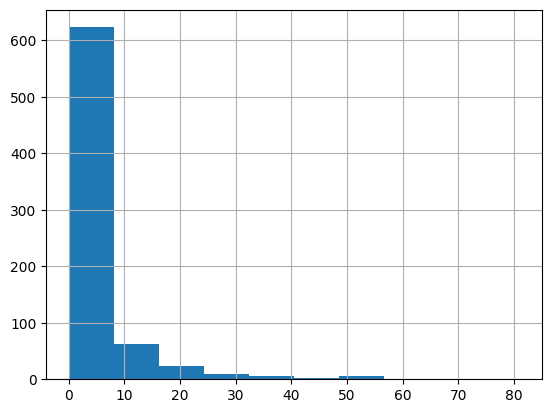

In [21]:
data2.Buts.hist()

Amélioration de la taille de l'histogramme

<Axes: >

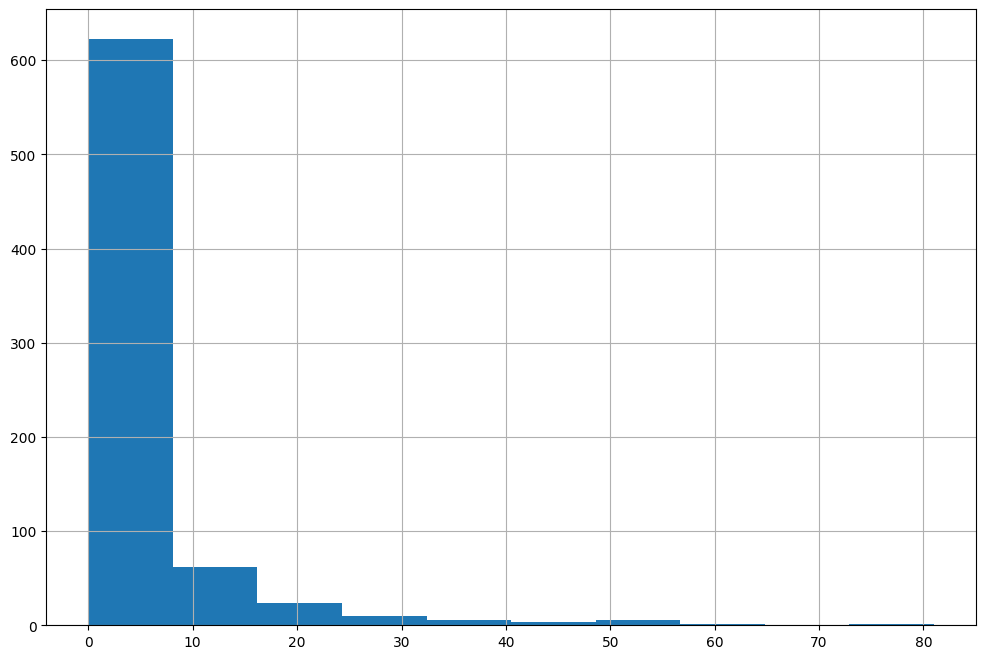

In [22]:
data2.Buts.hist(figsize=(12, 8))

Graphe en nuage de points reliant le nombre de buts marqués au nombre de capes

<Axes: xlabel='Capes', ylabel='Buts'>

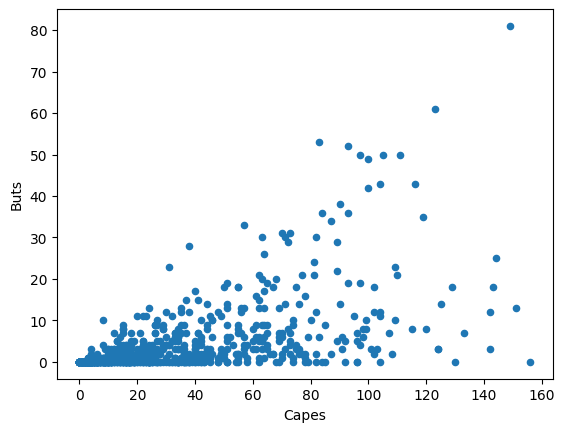

In [23]:
data2.plot.scatter(x="Capes", y="Buts")


On va s'intéresser maintenant aux données des joueurs Egyptiens, on vérifie les données puis on trace un graphe affichant le nombre de buts par joueur pour un nombre réduit de joueurs

In [24]:
dfEgypte=data2.query("Equipe=='Egypt'")

In [25]:
dfEgypte.tail()

,Equipe,Groupe,Poste,Nom,Naissance,Capes,Buts,Pays et Club
18,Egypt,A,MF,Ramadan Sobhi,1997-01-23,21,1,England Stoke City
19,Egypt,A,MF,Sam Morsy,1991-09-10,3,0,England Wigan Athletic
20,Egypt,A,MF,Shikabala,1986-03-05,28,2,Saudi Arabia Al Raed
21,Egypt,A,MF,Tarek Hamed,1988-10-24,19,0,Egypt Zamalek
22,Egypt,A,MF,Trézéguet,1994-10-01,23,2,Turkey Kasımpaşa


In [26]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [27]:
dfEgypte2=dfEgypte.loc[6:10]

In [28]:
dfEgypte2

,Equipe,Groupe,Poste,Nom,Naissance,Capes,Buts,Pays et Club
6,Egypt,A,DF,Mohamed Abdel-Shafy,1985-07-01,49,1,Saudi Arabia Al Fateh
7,Egypt,A,DF,Omar Gaber,1992-01-30,23,0,United States Los Angeles FC
8,Egypt,A,DF,Saad Samir,1989-04-01,10,0,Egypt Al Ahly
9,Egypt,A,FW,Marwan Mohsen,1989-02-26,22,4,Egypt Al Ahly
10,Egypt,A,FW,Mohamed Salah,1992-06-15,57,33,England Liverpool


<Axes: xlabel='Nom des joueurs'>

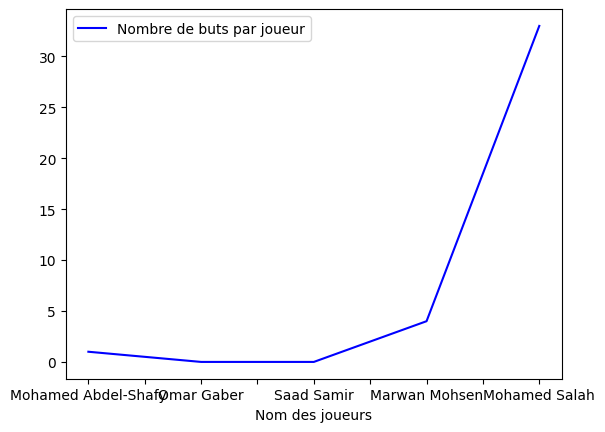

In [29]:
dfEgypte2.plot(x="Nom", y="Buts", label="Nombre de buts par joueur", color="blue",legend=True, xlabel="Nom des joueurs")

On réalise un groupby et on réunit les données par pays

In [30]:
groupe = data2.groupby("Equipe")

In [31]:
groupe.get_group("France")

,Equipe,Groupe,Poste,Nom,Naissance,Capes,Buts,Pays et Club
230,France,C,DF,Adil Rami,1985-12-27,33,1,France Marseille
231,France,C,DF,Benjamin Mendy,1994-07-17,4,0,England Manchester City
232,France,C,DF,Benjamin Pavard,1996-03-28,3,0,Germany VfB Stuttgart
233,France,C,DF,Djibril Sidibé,1992-07-29,15,1,France Monaco
234,France,C,DF,Lucas Hernández,1996-02-14,2,0,Spain Atlético Madrid
235,France,C,DF,Presnel Kimpembe,1995-08-13,1,0,France Paris Saint-Germain
236,France,C,DF,Raphaël Varane,1993-04-25,41,2,Spain Real Madrid
237,France,C,DF,Samuel Umtiti,1993-11-14,16,1,Spain Barcelona
238,France,C,FW,Antoine Griezmann,1991-03-21,51,19,Spain Atlético Madrid
239,France,C,FW,Florian Thauvin,1993-01-26,3,0,France Marseille


In [32]:
groupe["Buts"].max()

Equipe
Argentina       61
Australia       50
Belgium         30
Brazil          53
Colombia        29
Costa Rica      23
Croatia         30
Denmark         21
Egypt           33
England         15
France          30
Germany         38
Iceland         18
Iran            23
Japan           50
Mexico          49
Morocco         10
Nigeria         13
Panama          43
Peru            34
Poland          52
Portugal        81
Russia          12
Saudi Arabia    28
Senegal         18
Serbia          13
South Korea     20
Spain           35
Sweden          18
Switzerland     20
Tunisia         12
Uruguay         50
Name: Buts, dtype: int64

Affichage du nombre total de buts marqués par l'ensemble des joueurs d'une équipe au sein de toute leur carrière internationale

<Axes: xlabel='Equipe'>

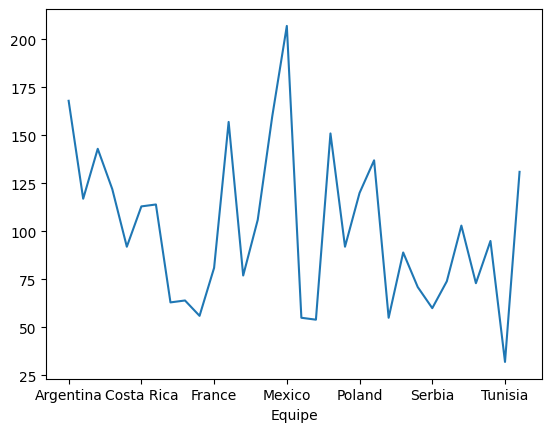

In [33]:
data2.groupby("Equipe")["Buts"].sum().plot()